In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/budget-txt/budget_speech.txt
/kaggle/input/budget-speech-2020/budget_speech.docx


In [2]:
#Importing Some Packages
import string
from string import punctuation
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer , SnowballStemmer
stemmer_s = SnowballStemmer('english')
from string import punctuation
stop_nltk=stopwords.words("english")
from nltk.tokenize import TweetTokenizer
tw=TweetTokenizer()
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data=pd.read_csv('/kaggle/input/budget-txt/budget_speech.txt',error_bad_lines=False, warn_bad_lines=False)

In [4]:
txt = " ".join(data['Budget 2020-2021'].values)

In [5]:
txt[:40]

'Speech of Nirmala Sitharaman Minister of'

## Raw Wordcloud

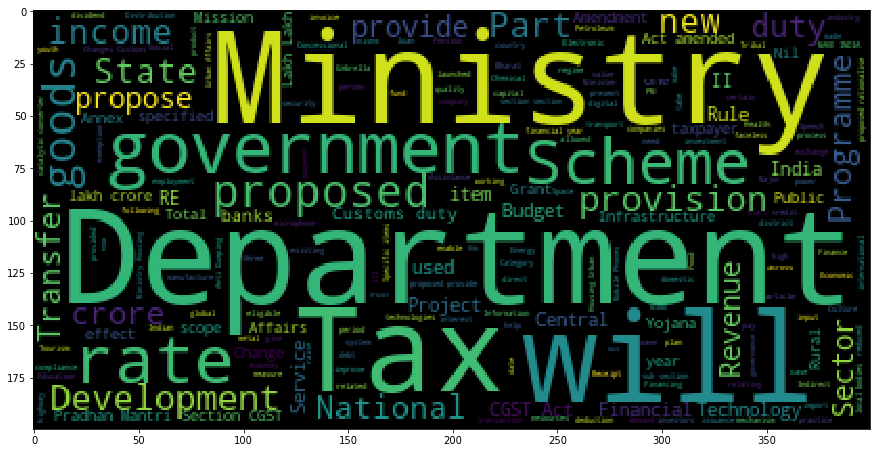

In [6]:
wordcloud = WordCloud().generate(txt)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

Here we can observe words spoken most are coming in bigger font and we have some words like department and others which have to be removed as we know the data is about budget and there words are gonna br common.

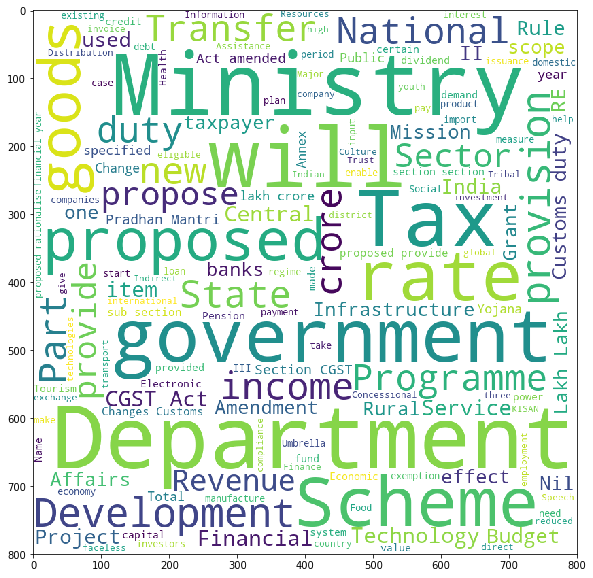

In [7]:
# A little Beautification.
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(txt)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

In [8]:
#Getting words and its frequency in dict-key-values.
y = {} 
for i in txt.split(' '): 
    y[i] = y.get(i,0)+1
#conversion:
freq = {'words':list(y.keys()) , 'freq':list(y.values())}

mydata=pd.DataFrame(freq)
mydata.sort_values(by='freq',ascending=False).head()

,words,freq
30,,864
1,of,295
8,to,179
10,the,169
20,and,131


Here we can see some "STOPWORDS" and space coming most times which has to be removed.

## Step-1/ Tokenizing

In [9]:
#Applying tokenizer
text=word_tokenize(txt.lower()) # Converting all words to lower case for Uniform Casing.
print(len(txt),len(text))

35408 6119


After tokenizating we are left with 6119 words.

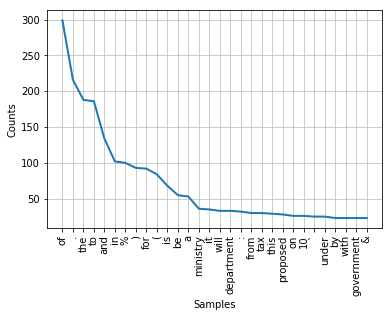

In [10]:
fdist = FreqDist(text)
fdist.plot(30,cumulative=False)
plt.show()

Still we have punctuations and ofcourse STOPWORDS which we will remove now.

## Step-2/Removing StopWords

In [11]:
from string import punctuation
stop_nltk=stopwords.words("english")
upd_stop = stop_nltk + ['department','government','proposed','under','centeral','will','ministry','provide','rate'] 
txt_upd = [term for term in text if term not in upd_stop and \
               term not in list(punctuation) and len(term)>2]
len(set(txt_upd))

1611

## Step-3/Lemmatization

In [12]:
newtxt=[lemm.lemmatize(word) for word in txt_upd]

## Final WordCloud

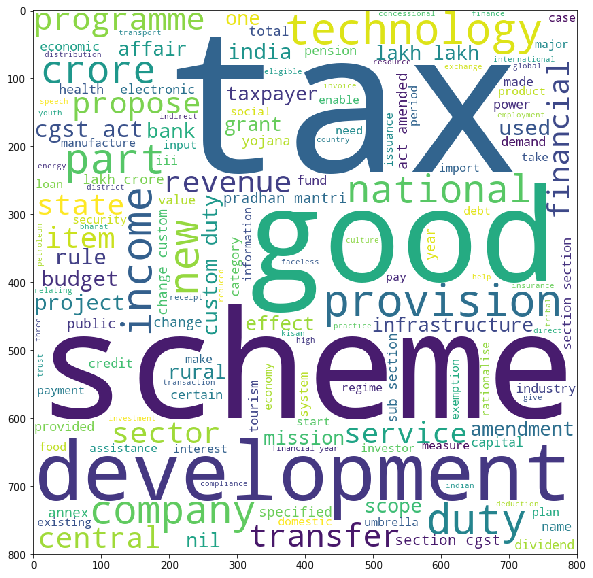

In [13]:
#New WordCloud
mytxt=" ".join(newtxt)
#Initiating WordCloud
word_cloud = WordCloud().generate(mytxt)
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(mytxt)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

- From this we can infer that 
    - good word is used - which is a positive sentiment
    - tax is been talked about the most
    - different schemes could have be launched or reviewed for different development purposes 
    - alse technology can be seen as one of mostly used word
    

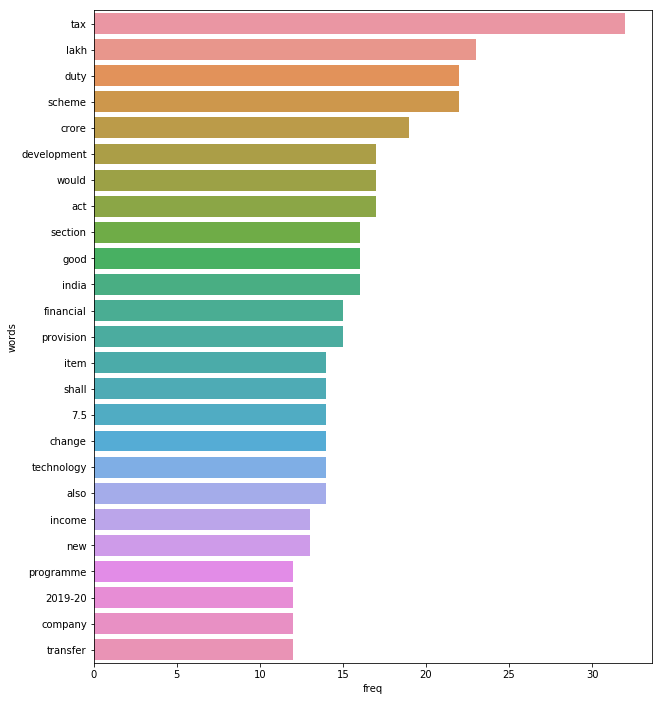

In [14]:
#Barplot
fdist = FreqDist(newtxt)
freq = {'words':list(fdist.keys()) , 'freq':list(fdist.values())}
df=pd.DataFrame(freq)
dat=df.sort_values(by='freq',ascending=False).head(25)
plt.figure(figsize=(10,12))
sns.barplot(data=dat,x='freq',y='words')
plt.show()

## Getting Bigrams for better inference

In [15]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(newtxt)
#Getting the BOW:-
count_vect.get_feature_names()
#Getting the DataFrame
DTM = pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names()) #datatermmatrix
# TDM=term document matrix
TDM = DTM.T
TDM.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Bigrams
count_vect_bg = CountVectorizer(ngram_range=(2,2),max_features=25)
X_bg = count_vect_bg.fit_transform(newtxt)
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())
DTM_bg.drop(columns=['01 04','04 2020','19 20','2019 20','2020 21'],inplace=True)#Dont need date columns so dropping them.

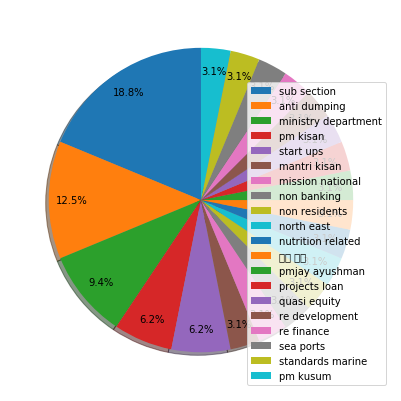

In [17]:
plt.figure(figsize=(10,7))
x=DTM_bg.sum().sort_values(ascending=False).head(25)
y=x.reset_index()
y.head(1)
plt.pie(y[0],autopct='%1.1f%%', startangle=90, pctdistance=0.85,shadow=True)
plt.legend(y['index'],loc='lower right')
plt.show()

- From Pie chart we can observe:
    - Different sub sections being talked about
    - Stress being given on 'Swach Bharat Abhiyaan' as anti dumping comes into picture.
    - pm kisaan yojna and start-ups given importance

## Getting Sentiment-score of the speech.

In [18]:
analyser = SentimentIntensityAnalyzer()
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']
print(get_vader_sentiment(mytxt))

0.9999


We get a positive .99 score which denotes a overall positive vibe throughout the speech.

## Clustering and analysis major topics of the budget.

In [19]:
tfidf_vect =TfidfVectorizer()
X=tfidf_vect.fit_transform(newtxt)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
y_means = kmeans.fit_predict(X.toarray())

In [21]:
BOW=tfidf_vect.get_feature_names()
num_clusters = 4
arr=kmeans.cluster_centers_
ordered_clu = arr.argsort()[:,::-1]
for i in range(num_clusters):
    print('Topics :',i)
    for i in ordered_clu[i,:5]:
        print(BOW[i])

Topics : 0
lakh
scheme
duty
section
crore
Topics : 1
tax
section
lakh
development
national
Topics : 2
used
would
act
cgst
custom
Topics : 3
state
act
would
shall
technology


Top 4 topics and top 5 terms in respective topics being used in the budget 2020.

If you find it interesting please do upvote.
- Thank You